In [1]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.contrib.eager as tfe

/home/max/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
# Set Eager API
tfe.enable_eager_execution()

In [3]:
# Training Data
train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
           7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]
train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
           2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]
n_samples = len(train_X)

# Parameters
learning_rate = 0.01
display_step = 100
num_steps = 1000

In [4]:
# Weight and Bias
W = tfe.Variable(np.random.randn())
b = tfe.Variable(np.random.randn())

# Linear regression (Wx + b)
def linear_regression(inputs):
    return inputs * W + b

# Mean square error
def mean_square_fn(model_fn, inputs, labels):
    return tf.reduce_sum(tf.pow(model_fn(inputs) - labels, 2)) / (2 * n_samples)

In [5]:
# SGD Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

# Compute gradients
grad = tfe.implicit_gradients(mean_square_fn)

In [8]:
# Initial cost, before optimizing
print("Initial cost= {:.9f}".format(
    mean_square_fn(linear_regression, train_X, train_Y)),
    "W=", W.numpy(), "b=", b.numpy())
# Training
for step in range(num_steps):

    optimizer.apply_gradients(grad(linear_regression, train_X, train_Y))

    if (step + 1) % display_step == 0 or step == 0:
        print(("Epoch:", '%04d' % (step + 1), "cost=",
              "{:.9f}".format(mean_square_fn(linear_regression, train_X, train_Y)),
              "W=", W.numpy(), "b=", b.numpy()))

Initial cost= 1.351327777 W= -0.04199064 b= 1.1868982
('Epoch:', '0001', 'cost=', '0.467833549', 'W=', 0.06385863, 'b=', 1.2013072)
('Epoch:', '0100', 'cost=', '0.085539348', 'W=', 0.19902666, 'b=', 1.1717702)
('Epoch:', '0200', 'cost=', '0.083682410', 'W=', 0.20504351, 'b=', 1.1291134)
('Epoch:', '0300', 'cost=', '0.082225911', 'W=', 0.21037225, 'b=', 1.091335)
('Epoch:', '0400', 'cost=', '0.081083551', 'W=', 0.21509151, 'b=', 1.0578777)
('Epoch:', '0500', 'cost=', '0.080187492', 'W=', 0.21927115, 'b=', 1.0282459)
('Epoch:', '0600', 'cost=', '0.079484761', 'W=', 0.22297259, 'b=', 1.0020044)
('Epoch:', '0700', 'cost=', '0.078933537', 'W=', 0.22625074, 'b=', 0.9787638)
('Epoch:', '0800', 'cost=', '0.078501202', 'W=', 0.22915392, 'b=', 0.9581815)
('Epoch:', '0900', 'cost=', '0.078162104', 'W=', 0.23172511, 'b=', 0.93995297)
('Epoch:', '1000', 'cost=', '0.077896126', 'W=', 0.23400222, 'b=', 0.92380923)


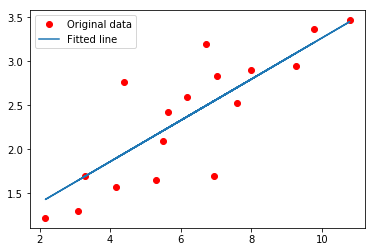

In [21]:
# Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, np.array(W * train_X + b), label='Fitted line')
plt.legend()
plt.show()